Classification des points à l'intérieur d'un cercle avec un réseau de neurones MLP en utilisant Scikit-learn
=====

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm 
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Génération d'un ensemble d'entraînement et de test pour un réseau de neurones en créant une matrice de points dans un carré et en les étiquetant comme appartenant à l'une des deux classes en fonction de leur distance par rapport au centre du carré.



In [62]:
# créer les variables des ensembles d'entrainement
essais = 1000 
x_dim = 2
L = 12  # la longueur du côté du carré
X = np.zeros((essais, x_dim))
Y = np.zeros(shape=(essais,))

# générer des coordonnées x et y aléatoires dans le carré
X[:, 0] = np.random.uniform(low=-L/2, high=L/2, size=essais)
X[:, 1] = np.random.uniform(low=-L/2, high=L/2, size=essais)

# déterminer les points dans un rayon de 3 du centre
centre = [0, 0]
rayon = 3
distance_au_centre = np.sqrt(np.sum((X - centre)**2, axis=1))
Y[distance_au_centre <= rayon] = 0
Y[distance_au_centre > rayon] = 1

On affiche un graphique qui trace les points en deux dimensions appartenant aux groupes Y=0 et Y=1 avec des couleurs différentes.

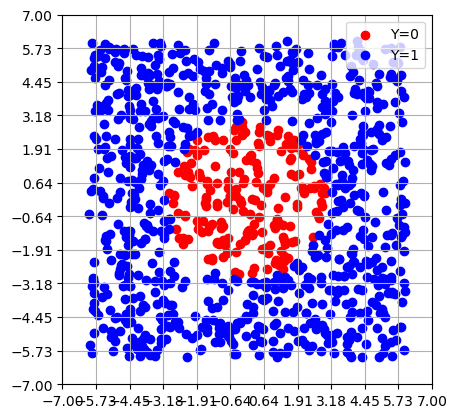

In [63]:
fig, ax = plt.subplots()

# tracer les points appartenant au groupe Y = 0 en rouge
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label='Y=0')

# tracer les points appartenant au groupe Y = 1 en bleu
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='b', label='Y=1')

ax.set_xlim(-L/1.9, L/1.9)
ax.set_ylim(-L/1.9, L/1.9)
ax.set_aspect('equal')

ax.xaxis.set_ticks(np.linspace(-7,7,12)) 
ax.yaxis.set_ticks(np.linspace(-7,7,12)) 

plt.grid()
plt.legend()
plt.show()


Création d'un modèle de réseau de neurones avec deux couches (de 32 et 16 neurones), ensuite on sépare les données en ensembles d'entraînement et de test. On entraîne le modèle sur les données d'entraînement en enregistrant la perte, puis on trace l'évolution de la perte au fil des itérations et on prédit les étiquettes des données de test.

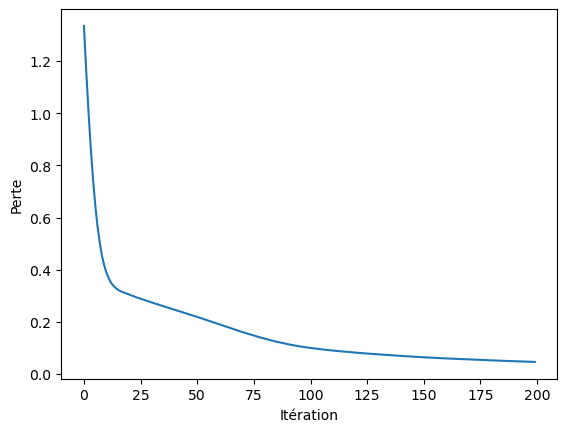

In [79]:
# créer le modèle de réseau de neurones
model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=200)

# séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# entraîner le modèle sur les données d'entraînement en enregistrant la perte
train_loss = []
for i in range(model.max_iter):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_loss.append(model.loss_)
    
# tracer l'évolution de la perte au fil des itérations
plt.plot(train_loss)
plt.xlabel('Itération')
plt.ylabel('Perte')
plt.show()

# prédire les étiquettes des données de test
y_pred = model.predict(X_test)

In [80]:
# calculer la précision du modèle sur les données de test
accuracy = accuracy_score(y_test, y_pred)
print('Précision:', accuracy)

Précision: 0.99


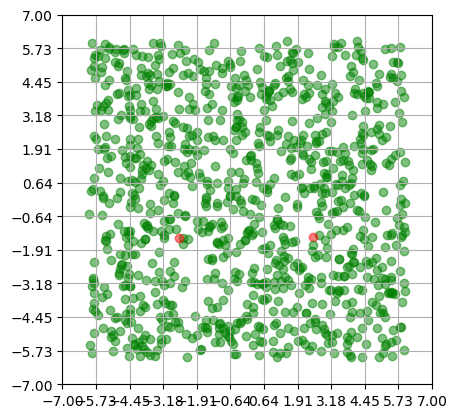

In [75]:
# prédire toutes les étiquettes à partir du modèle
Y_pred = model.predict(X)

# afficher les points en vert si la prédiction est correcte, sinon en rouge
fig, ax = plt.subplots()
for i in range(len(X)):
    if Y[i] == Y_pred[i]:
        ax.scatter(X[i, 0], X[i, 1], c='g', alpha=0.5)
    else:
        ax.scatter(X[i, 0], X[i, 1], c='r', alpha=0.5)

ax.set_xlim(-L/1.9, L/1.9)
ax.set_ylim(-L/1.9, L/1.9)
ax.set_aspect('equal')

ax.xaxis.set_ticks(np.linspace(-7,7,12)) 
ax.yaxis.set_ticks(np.linspace(-7,7,12)) 

plt.grid()
plt.show()


In [81]:
num_incorrect = np.sum(Y_pred != Y)
print("Nombre de points mal prédit : ", num_incorrect)

Nombre de points mal prédit :  2


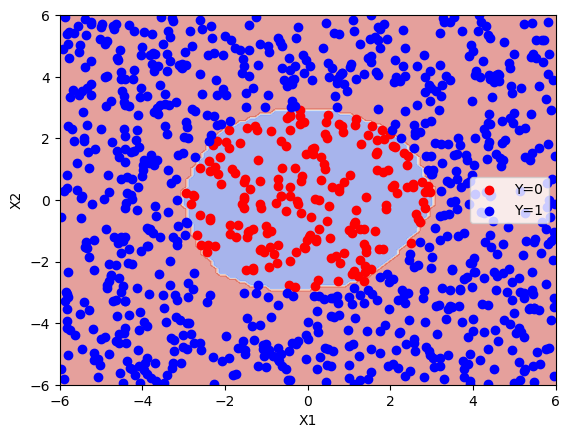

In [82]:
# définir la grille de points dans l'espace de l'entrée X
xmin, xmax, ymin, ymax = -6, 6, -6, 6
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Xgrid = np.c_[xx.ravel(), yy.ravel()]

# calculer les prédictions pour chaque point sur la grille
Z = model.predict(Xgrid)

# afficher les contours de la séparation entre les deux classes
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='coolwarm', alpha=0.5)

# tracer les points appartenant au groupe Y = 0 en rouge
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label='Y=0')

# tracer les points appartenant au groupe Y = 1 en bleu
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='b', label='Y=1')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()